In [10]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [11]:
df = pd.read_csv("Bagalkot_Amengad.csv")
df.head()

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR_Date,...,VICTIM COUNT,Accused Count,Arrested Male,Arrested Female,Arrested Count\tNo.,Accused_ChargeSheeted Count,Conviction Count,FIR_ID,Unit_ID,Crime_No
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00.000,2015-12-27 12:05:00.000,2016-01-05 11:00:00.000,05/01/2016,...,0,1,1,0,1,1,0,2016000002,1245,10470124520160001
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00.000,2016-01-12 17:35:00.000,2016-01-12 19:00:00.000,12/01/2016,...,0,5,5,0,5,5,2,2016000003,1245,10470124520160002
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00.000,2016-01-12 17:50:00.000,2016-01-12 19:30:00.000,12/01/2016,...,0,1,1,0,1,1,0,2016000004,1245,10470124520160003
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00.000,2016-01-14 21:35:00.000,2016-01-15 14:00:00.000,15/01/2016,...,0,1,1,0,1,1,0,2016000005,1245,10470124520160004
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00.000,2016-01-18 15:05:00.000,2016-01-18 19:30:00.000,18/01/2016,...,0,1,1,0,1,1,0,2016000006,1245,10470124520160005


In [12]:
print(df['CrimeGroup_Name'].unique())
print(len(df['CrimeGroup_Name'].unique()))

['POCSO' 'KARNATAKA POLICE ACT 1963' 'MOTOR VEHICLE ACCIDENTS NON-FATAL'
 'MOTOR VEHICLE ACCIDENTS FATAL' 'THEFT' 'CrPC' 'CRUELTY BY HUSBAND'
 'ATTEMPT TO MURDER' 'CHEATING' 'Karnataka State Local Act' 'ELECTION'
 ' REPRESENTATION OF PEOPLE ACT 1951 & 1988' 'MOLESTATION'
 'MISSING PERSON' 'CASES OF HURT' 'FORGERY'
 'SCHEDULED CASTE AND THE SCHEDULED TRIBES ' 'BURGLARY - NIGHT'
 'NEGLIGENT ACT' 'MURDER' 'RIOTS' 'Attempting to commit offences'
 'KIDNAPPING AND ABDUCTION' 'EXPLOSIVES'
 'EXPOSURE AND ABANDONMENT OF CHILD' 'ARSON' 'CONSUMER'
 'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)'
 'CRIMES RELATED TO WOMEN' 'DEATHS DUE TO RASHNESS/NEGLIGENCE'
 'COMMUNAL / RELIGION   ' 'DOWRY DEATHS' 'CRIMINAL BREACH OF TRUST'
 'DACOITY' ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984'
 'BURGLARY - DAY' 'ANIMAL' 'MISCHIEF'
 'INSULTING MODESTY OF WOMEN (EVE TEASING)' 'CRIMINAL TRESPASS'
 'CRIMINAL INTIMIDATION' 'CRIMINAL CONSPIRACY' 'SUICIDE'
 'NARCOTIC DRUGS & PSHYCOTROPIC SUBSTAN

In [13]:
dffir = pd.read_csv(r"D:\KRK Datathon\datathon\Predictive Crime Analytics\FIR_Details_Data.csv")

C:\Users\prana\AppData\Local\Temp\ipykernel_11472\942108576.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dffir = pd.read_csv(r"D:\KRK Datathon\datathon\Predictive Crime Analytics\FIR_Details_Data.csv")


In [14]:
print(dffir['CrimeGroup_Name'].unique())
print(len(dffir['CrimeGroup_Name'].unique()))

['POCSO' 'KARNATAKA POLICE ACT 1963' 'MOTOR VEHICLE ACCIDENTS NON-FATAL'
 'MOTOR VEHICLE ACCIDENTS FATAL' 'THEFT' 'CrPC' 'CRUELTY BY HUSBAND'
 'ATTEMPT TO MURDER' 'CHEATING' 'Karnataka State Local Act' 'ELECTION'
 ' REPRESENTATION OF PEOPLE ACT 1951 & 1988' 'MOLESTATION'
 'MISSING PERSON' 'CASES OF HURT' 'FORGERY'
 'SCHEDULED CASTE AND THE SCHEDULED TRIBES ' 'BURGLARY - NIGHT'
 'NEGLIGENT ACT' 'MURDER' 'RIOTS' 'Attempting to commit offences'
 'KIDNAPPING AND ABDUCTION' 'EXPLOSIVES'
 'EXPOSURE AND ABANDONMENT OF CHILD' 'ARSON' 'CONSUMER'
 'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)'
 'CRIMES RELATED TO WOMEN' 'DEATHS DUE TO RASHNESS/NEGLIGENCE'
 'COMMUNAL / RELIGION   ' 'DOWRY DEATHS' 'CRIMINAL BREACH OF TRUST'
 'DACOITY' ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984'
 'BURGLARY - DAY' 'ANIMAL' 'MISCHIEF'
 'INSULTING MODESTY OF WOMEN (EVE TEASING)' 'CRIMINAL TRESPASS'
 'CRIMINAL INTIMIDATION' 'CRIMINAL CONSPIRACY' 'SUICIDE'
 'NARCOTIC DRUGS & PSHYCOTROPIC SUBSTAN

In [15]:
countlst = (dffir['CrimeGroup_Name'].value_counts()).to_string()
print(countlst)

CrimeGroup_Name
MOTOR VEHICLE ACCIDENTS NON-FATAL                                              245780
THEFT                                                                          160669
CrPC                                                                           140245
CASES OF HURT                                                                  127429
MISSING PERSON                                                                 126237
KARNATAKA POLICE ACT 1963                                                      108660
Karnataka State Local Act                                                       91769
MOTOR VEHICLE ACCIDENTS FATAL                                                   83883
 CYBER CRIME                                                                    79756
CHEATING                                                                        49148
MOLESTATION                                                                     43300
PUBLIC SAFETY                         

In [16]:
print(dffir[dffir['District_Name']=='Bengaluru City']['UnitName'].unique())
print(len(dffir[dffir['District_Name']=='Bengaluru City']['UnitName'].unique()))

['Adugodi PS' 'Adugodi Traffic PS' 'Airport PS' 'Airport Traffic PS'
 'Amruthahally PS' 'Annapoorneshwari Nagar PS' 'Ashoknagar PS'
 'Ashoknagar Traffic PS' 'Bagalagunte PS' 'Bagalur PS'
 'Banasawadi Traffic PS' 'Banashankari PS' 'Banashankari Traffic PS'
 'Banaswadi PS' 'Bandepalya PS' 'Basavanagudi PS'
 'Basavanagudi Traffic PS' 'Basavanagudi Women PS' 'Basaveshwara Nagar PS'
 'Beguru PS' 'Bellanduru PS' 'Bellanduru Traffic PS' 'Bharathi Nagar PS'
 'BIAL PS' 'Bommanahalli PS' 'Bowring Hospital PS' 'Byadarahalli PS'
 'Byappanahalli PS' 'Byatarayanapura  PS' 'Byatrarayanapura Traffic PS'
 'Central CEN Crime PS' 'Chamarajpet PS' 'Chandra Layout PS'
 'Channammanakere Achu Kattu PS' 'Chickabanavara Traffic PS' 'Chickpet PS'
 'Chickpet Traffic PS' 'Chikkajala PS' 'Chikkajala Traffic PS'
 'City Market PS' 'City Market Traffic PS' 'Commercial Street PS'
 'Cottonpet PS' 'Cubbon Park PS' 'Cubbonpark Traffic PS'
 'Cyber Crime Police Station' 'Devanahalli PS' 'Devanahalli Traffic PS'
 'Devarajee

In [17]:
'''
crimelst = ['POCSO', 'KARNATAKA POLICE ACT 1963', 'MOTOR VEHICLE ACCIDENTS NON-FATAL',
            'MOTOR VEHICLE ACCIDENTS FATAL', 'THEFT', 'CrPC', 'CRUELTY BY HUSBAND',
            'ATTEMPT TO MURDER', 'CHEATING', 'Karnataka State Local Act', 'ELECTION',
            ' REPRESENTATION OF PEOPLE ACT 1951 & 1988', 'MOLESTATION',
            'MISSING PERSON', 'CASES OF HURT', 'FORGERY',
            'SCHEDULED CASTE AND THE SCHEDULED TRIBES ', 'BURGLARY - NIGHT',
            'NEGLIGENT ACT', 'MURDER', 'RIOTS', 'Attempting to commit offences',
            'KIDNAPPING AND ABDUCTION', 'EXPLOSIVES',
            'EXPOSURE AND ABANDONMENT OF CHILD', 'ARSON', 'CONSUMER',
            'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)',
            'CRIMES RELATED TO WOMEN', 'DEATHS DUE TO RASHNESS/NEGLIGENCE',
            'COMMUNAL / RELIGION   ', 'DOWRY DEATHS', 'CRIMINAL BREACH OF TRUST',
            'DACOITY', ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984',
            'BURGLARY - DAY', 'ANIMAL', 'MISCHIEF',
            'INSULTING MODESTY OF WOMEN (EVE TEASING)', 'CRIMINAL TRESPASS',
            'CRIMINAL INTIMIDATION', 'CRIMINAL CONSPIRACY', 'SUICIDE',
            'NARCOTIC DRUGS & PSHYCOTROPIC SUBSTANCES', 'PUBLIC SAFETY', 'CHILDREN ACT',
            'ROBBERY', 'RAPE', 'ANTIQUES (CULTURAL PROPERTY)', ' CYBER CRIME',
            'Concealment of birth by secret disposal of Child', 'FOREST', 'AFFRAY',
            'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'DEFAMATION',
            'ATTEMPT TO CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
            'WRONGFUL RESTRAINT/CONFINEMENT',
            'COTPA, CIGARETTES AND OTHER TOBACCO PRODUCTS',
            'CRIMINAL MISAPPROPRIATION ',
            'ASSAULT OR USE OF CRIMINAL FORCE TO DISROBE WOMAN',
            'Disobedience to Order Promulgated by PublicServan', 'UNNATURAL SEX ',
            'POISONING-PROFESSIONAL', 'ASSAULT', 'ARMS ACT  1959', 'SEDITION',
            'COPY RIGHT ACT 1957', 'OF ABETMENT', 'OFFENCES RELATED TO MARRIAGE',
            'PUBLIC NUISANCE', 'Failure to appear to Court', 'ADULTERATION',
            ' POST & TELEGRAPH,TELEGRAPH WIRES(UNLAWFUL POSSESSION)ACT 1950',
            'IMPERSONATION ', 'PUBLIC JUSTICE', 'OFFENCES PROMOTING ENEMITY',
            'INDIAN MOTOR VEHICLE', 'COUNTERFEITING', 'DEATHS-MISCARRIAGE',
            'PORNOGRAPHY', 'IMMORAL TRAFFIC', 'FALSE EVIDENCE', 'BONDED LABOUR SYSTEM',
            'ESCAPE FROM LAWFUL CUSTODY AND RESISTANCE', 'PASSPORT ACT',
            'Human Trafficking',
            'OFFENCES BY PUBLIC SERVANTS (EXCEPT CORRUPTION) (Public servant is accused)',
            'SLAVERY', 'Giving false information respecting an offence com',
            'FOREIGNER', 'RECEIVING OF STOLEN PROPERTY',
            'OFFICIAL SECURITY RELATED ACTS',
            'UNLAWFUL ACTIVITIES(Prevention)ACT 1967 ',
            'UNNATURAL DEATH (Sec 174/174c/176)', 'CINEMATOGRAPH ACT 1952',
            'DOCUMENTS & PROPERTY MARKS',
            'DEFENCE FORCES OFFENCES RELATING TO (also relating to desertion)',
            'INDIAN ELECTRICITY ACT ', 'PREVENTION OF CORRUPTION ACT 1988',
            'INFANTICIDE', 'NATIONAL SECURITY ACT', 'ILLEGAL DETENTION', 'RAILWAYS ACT',
            'OFFENCES AGAINST STATE', 'CIVIL RIGHTS ', 'FAILURE TO APPEAR TO COURT',
            'BUYING & SELLING MINOR FOR PROSTITUTION']


for crimename in crimelst:
    # Create a new figure for each crime category
    plt.figure(figsize=(30, 6))

    # Convert 'Offence_From_Date' column to datetime format
    dffir['Offence_From_Date'] = pd.to_datetime(dffir['Offence_From_Date'])

    # Extract month and year from 'Offence_From_Date' column and create new columns 'Month' and 'Year'
    dffir['Month'] = dffir['Offence_From_Date'].dt.month
    dffir['Year'] = dffir['Offence_From_Date'].dt.year

    # Filter the DataFrame for the current crime group
    filtered_df = dffir[(dffir['CrimeGroup_Name'] == crimename) & (dffir['UnitName'] == 'Electronic City PS')]

    # Group by 'Year', 'Month', and count occurrences
    crime_counts = filtered_df.groupby(['Year', 'Month']).size().reset_index(name='Count')

    # Plotting the graph
    plt.plot(crime_counts['Year'].astype(str) + '-' + crime_counts['Month'].astype(str), crime_counts['Count'])

    plt.xlabel('Month-Year')
    plt.ylabel('Count')
    plt.title('Count of ' + crimename + ' Month-Year-wise')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.grid(True)
    plt.tight_layout()
    plt.show()
'''

"\ncrimelst = ['POCSO', 'KARNATAKA POLICE ACT 1963', 'MOTOR VEHICLE ACCIDENTS NON-FATAL',\n            'MOTOR VEHICLE ACCIDENTS FATAL', 'THEFT', 'CrPC', 'CRUELTY BY HUSBAND',\n            'ATTEMPT TO MURDER', 'CHEATING', 'Karnataka State Local Act', 'ELECTION',\n            ' REPRESENTATION OF PEOPLE ACT 1951 & 1988', 'MOLESTATION',\n            'MISSING PERSON', 'CASES OF HURT', 'FORGERY',\n            'SCHEDULED CASTE AND THE SCHEDULED TRIBES ', 'BURGLARY - NIGHT',\n            'NEGLIGENT ACT', 'MURDER', 'RIOTS', 'Attempting to commit offences',\n            'KIDNAPPING AND ABDUCTION', 'EXPLOSIVES',\n            'EXPOSURE AND ABANDONMENT OF CHILD', 'ARSON', 'CONSUMER',\n            'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)',\n            'CRIMES RELATED TO WOMEN', 'DEATHS DUE TO RASHNESS/NEGLIGENCE',\n            'COMMUNAL / RELIGION   ', 'DOWRY DEATHS', 'CRIMINAL BREACH OF TRUST',\n            'DACOITY', ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984',\n    

In [53]:
# Create new column 'year_month' by combining year and month
dffir['year_month'] = pd.to_datetime(dffir['Year'].astype(str) + '-' + dffir['Month'].astype(str), format='%Y-%m')

# Filter for POCSO cases and count them by year_month
pocso_count = dffir[dffir['CrimeGroup_Name'] == 'POCSO'].groupby('year_month').size().to_frame(name='count')
pocso_count = pocso_count.sort_values(by='year_month')
# Print result (or alternatively you can return the 'pocso_count' dataframe)
print(pocso_count)
pocso_count.to_csv('karnataka_pocso_count.csv', index=True)

            count
year_month       
2016-01-01    149
2016-02-01    128
2016-03-01    150
2016-04-01    149
2016-05-01    169
...           ...
2023-11-01    296
2023-12-01    392
2024-01-01    305
2024-02-01    278
2024-03-01     55

[99 rows x 1 columns]


In [37]:
dfkarnatakaposco = pd.read_csv("karnataka_pocso_count.csv",index_col='year_month')
dfkarnatakaposco.head()

,count
year_month,
2016-1,149
2016-10,135
2016-11,141
2016-12,123
2016-2,128


<Axes: xlabel='year_month'>

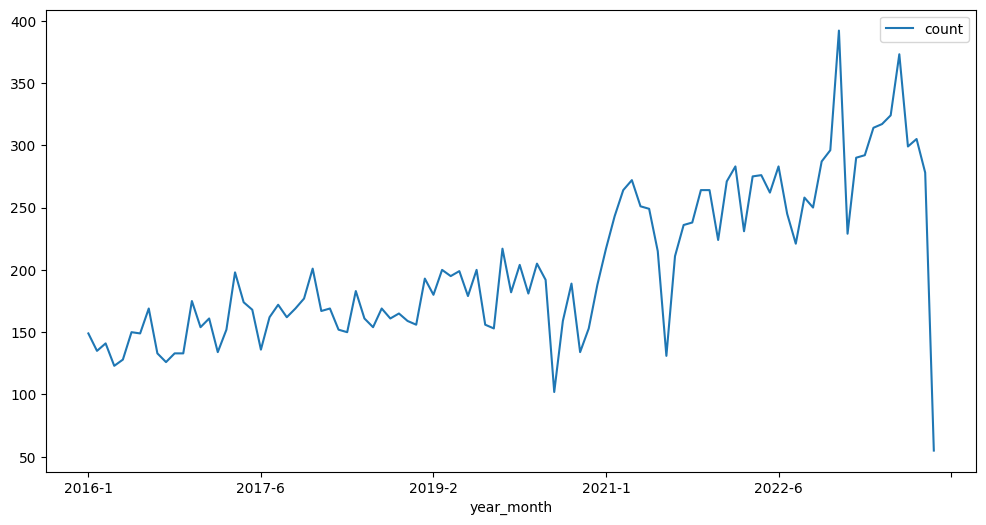

In [41]:
dfkarnatakaposco.plot(figsize=(12,6))

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
dfkarnatakaposco_resampled = dfkarnatakaposco.resample('MS')['count']  # Resample to monthly on 'count' column


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [47]:
dfkarnatakaposco.index.freq='MS'
results = seasonal_decompose(dfkarnatakaposco['count'])
results.plot()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

dffir = pd.read_csv(r"D:\KRK Datathon\datathon\Predictive Crime Analytics\FIR_Details_Data.csv")
dffir['year_month'] = pd.to_datetime(dffir['Year'].astype(str) + '-' + dffir['Month'].astype(str), format='%Y-%m')

amengadpsmotornonfatal_count = dffir[(dffir['CrimeGroup_Name'] == 'MOTOR VEHICLE ACCIDENTS NON-FATAL') & (dffir['UnitName'] == 'Amengad PS')].groupby('year_month').size().to_frame(name='count')
idx = pd.date_range(start=dffir['year_month'].min(), end=dffir['year_month'].max(), freq='MS')
amengadpsmotornonfatal_count = amengadpsmotornonfatal_count.reindex(idx, fill_value=0)
amengadpsmotornonfatal_count.index.name = 'year_month'
print(amengadpsmotornonfatal_count)
print(amengadpsmotornonfatal_count.columns)

amengadpsmotornonfatal_count = amengadpsmotornonfatal_count.sort_values(by='year_month')
amengadpsmotornonfatal_count.drop(amengadpsmotornonfatal_count.tail(1).index,inplace=True)

C:\Users\prana\AppData\Local\Temp\ipykernel_19368\3750116870.py:15: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dffir = pd.read_csv(r"D:\KRK Datathon\datathon\Predictive Crime Analytics\FIR_Details_Data.csv")


            count
year_month       
2016-01-01      3
2016-02-01      1
2016-03-01      1
2016-04-01      3
2016-05-01      3
...           ...
2023-11-01      0
2023-12-01      1
2024-01-01      0
2024-02-01      4
2024-03-01      2

[99 rows x 1 columns]
Index(['count'], dtype='object')
